# Face Detection and Verification

จุดประสงค์ของ **`Face Detection and Verification`** คือตัวอย่างของการค้นหาใบหน้าบุคคล (`Face Detection`) จากรูปภาพ และนำใบหน้าที่ค้นเจอนั้นไปตรวจสอบ (`Face Verification`) กับใบหน้าทั้งหมดที่จัดเก็บอยู่ในไดเรกทรอรี่ โดยระบบจะแสดงค่าความคล้ายคลึง (Similarity Value) ระหว่างใบหน้าที่นำไปค้นหา (Unknown Image) และใบหน้าทั้งหมดในไดเรกทรอรี่ (Known Image) โดยค่า Similarity ที่สูงสุดเป็นค่าที่ดีที่สุด และใช้เพื่อบ่งบอกว่าอาจจะเป็นบุคคลเดียวกัน

## กระบวนการ Face Detection และ Verification

* **แปลงรูปภาพ (Image Conversion)** - แปลงรูปภาพ (Convert) จากภาพสี (Color Image) ให้เป็นภาพสีเทา (Gray Image) 
* ค้นหาใบหน้า (Face Detection) ด้วยวิธีการ Haar-Cascade Classifier
* **เปลี่ยนขนาดรูปภาพ (Image Resize)** - เปลี่ยนขนาดรูปภาพ (Resize Image) ของใบหน้า (Face Image) ที่ค้นเจอทุกรูปให้มีขนาดเท่ากัน 
* **คำนวณหาคุณลักษณะพิเศษ (Feature Extraction)** - นำรูปภาพใบหน้าที่เปลี่ยนขนาด ไปคำนวณหาคุณลักษณะพิเศษ (Feature Extraction) ด้วยวิธี Histogram of Oriented Gradients (HOG) เพื่อให้ได้ชุดรหัสข้อมูล (Feature Vector) ที่ใช้เป็นตัวแทนของรูปภาพใบหน้า
* **คำนวณหาค่าความคล้ายคลึง (Similarity Function)** - นำ Feature Vector ของใบหน้าของภาพ Unknown Image ไปตรวจสอบกับ Feature Vector ของใบหน้าที่อยู่ในไดเรกทรอรี่ (Known Image) ด้วยฟังก์ชันคำนวณค่าความคล้ายคลึง (Similarity Function) ในกรณีนี้ใช้ Cosine Similarity Function ในการคำนวณ
* **ดังนั้น** ค่าความคล้ายคลึงระหว่างรูปภาพ Unknown Image กับรูปภาพที่อยู่ในไดเรกทรอรี่ที่สูงที่สุด แสดงว่า Unknown Image คล้ายคลึงกับรูปนั้นมากที่สุด

![alt text](http://ias.it.msu.ac.th/course/1201374-Image-processing/1-2562/Face-Detection-Verification.jpg)

# อ่านรูปภาพจาก google drive

## Mount drive จาก google

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
!ls '/gdrive/My Drive/Colab Notebooks/1-2562-DIP/people-images/'

coutinho  messi  ronaldo  vandijk


## อ่านข้อมูลรูปภาพจากไดเรกทรอรี่

In [3]:
import glob

path = '/gdrive/My Drive/Colab Notebooks/1-2562-DIP/people-images/'
pattern_search = '**/*.[jpJP]*[gG]'

files = [f for f in glob.glob(path + pattern_search, recursive=True)]

print('Number of image(s):', len(files))
for f in files:
    print(f)

Number of image(s): 21
/gdrive/My Drive/Colab Notebooks/1-2562-DIP/people-images/coutinho/coutinho-3.jpg
/gdrive/My Drive/Colab Notebooks/1-2562-DIP/people-images/coutinho/coutinho-5.jpg
/gdrive/My Drive/Colab Notebooks/1-2562-DIP/people-images/coutinho/coutinho-2.jpg
/gdrive/My Drive/Colab Notebooks/1-2562-DIP/people-images/coutinho/coutinho-1.jpg
/gdrive/My Drive/Colab Notebooks/1-2562-DIP/people-images/coutinho/coutinho-4.jpg
/gdrive/My Drive/Colab Notebooks/1-2562-DIP/people-images/ronaldo/ronaldo-1.jpg
/gdrive/My Drive/Colab Notebooks/1-2562-DIP/people-images/ronaldo/ronaldo-3.jpg
/gdrive/My Drive/Colab Notebooks/1-2562-DIP/people-images/ronaldo/ronaldo-2.jpg
/gdrive/My Drive/Colab Notebooks/1-2562-DIP/people-images/ronaldo/ronaldo-4.jpg
/gdrive/My Drive/Colab Notebooks/1-2562-DIP/people-images/ronaldo/ronaldo-5.jpg
/gdrive/My Drive/Colab Notebooks/1-2562-DIP/people-images/ronaldo/ronaldo-6.jpg
/gdrive/My Drive/Colab Notebooks/1-2562-DIP/people-images/vandijk/vandijk-1.png
/gdrive

# ค้นหาใบหน้าด้วยวิธี Haar-Cascade Classifier และนำใบหน้าไปหาคุณลักษณะพิเศษด้วยวิธี Histogram of Oriented Gradient (HOG)

## โหลด XML Model ของใบหน้า

In [4]:
! wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2019-08-28 02:45:33--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.08s   

2019-08-28 02:45:33 (11.7 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



## สร้างฟังก์ชัน 
* **`return_image`** คือฟังก์ชันที่ใช้สำหรับการอ่านรูปภาพจาก drive และคืนค่า (return) เป็นรูปสี และรูปสีเทา
* **`face_detection_haarcascade`** คือฟังก์ชันที่ใช้ค้นหาใบหน้าด้วยวิธี Haar-Cascade Classifier โดยจะคืนค่าตำแหน่งของใบหน้า (x,y,w,h) ออกมา
* **`hog_feature`** คือฟังก์ชันที่ใช้คำนวณหาค่าคุณลักษณะพิเศษด้วยวิธี Histogram of Oriented Gradients (HOG)

In [0]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

def return_image(file_loc):
  
  image = cv.imread(file_loc, 1)
  image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  color_img = np.array(image)
  gray_img = cv.cvtColor(color_img, cv.COLOR_BGR2GRAY)
      
  return color_img, gray_img


def face_detection_haarcascade(gray):
  
  # ค้นหาใบหน้า ต้องใช้รูปภาพสีเทาในการหา
  gray = np.array(gray, dtype='uint8')
  faces = face_cascade.detectMultiScale(gray, 1.3, 5, 0)
  print('Detected Face:', len(faces))
  
  if(len(faces) == 0):
    x,y,w,h = [0,0,0,0]

  # วาดกรอบสี่เหลี่ยมรอบใบหน้า
  for (x,y,w,h) in faces:
    print("face location and size", x,y,w,h)
    
  return x,y,w,h


def hog_feature(img, orientations=8, pixels_per_cell=(8,8), cells_per_block=(1,1)):
  fd, hog_image = feature.hog(img, 
                              orientations=orientations, 
                              pixels_per_cell=pixels_per_cell,
                              cells_per_block=cells_per_block, 
                              visualize=True, 
                              multichannel=True)
  return fd, hog_image

## ค้นหาใบหน้า และคำนวณหาคุณลักษณะพิเศษ

In [6]:
from skimage import feature
from skimage import transform
import numpy as np

x_data = []
y_data = []
y_full_name = []

# กำหนดขนาดของใบหน้าที่จะนำไปหาคุณลักษณะพิเศษ
n_rows, n_cols = [80,80]


cnt = 1
for f in files:
  label = f.split('/')[-2]
  print('#', cnt, ':', label)
  color_img, gray_img = return_image(f)
  x,y,w,h = face_detection_haarcascade(gray_img)
  
  if((x != 0) and (y != 0)):
    face_img = color_img[y:y+h, x:x+w]
    re_img = transform.resize(face_img, (n_rows, n_cols), anti_aliasing=False)
    fd, hog_image = hog_feature(re_img, orientations=8, pixels_per_cell=(8,8), cells_per_block=(1,1))
    y_full_name.append(f)
    y_data.append(label)
    x_data.append(fd)
    print(len(fd))
  cnt+=1
  
x_data = np.asarray(x_data)

print('Number of face(s):', len(y_data))

# 1 : coutinho
Detected Face: 1
face location and size 236 49 102 102
800
# 2 : coutinho
Detected Face: 1
face location and size 341 115 205 205
800
# 3 : coutinho
Detected Face: 1
face location and size 404 237 151 151
800
# 4 : coutinho
Detected Face: 1
face location and size 275 34 64 64
800
# 5 : coutinho
Detected Face: 0
# 6 : ronaldo
Detected Face: 1
face location and size 225 76 138 138
800
# 7 : ronaldo
Detected Face: 1
face location and size 780 124 454 454
800
# 8 : ronaldo
Detected Face: 1
face location and size 351 118 243 243
800
# 9 : ronaldo
Detected Face: 2
face location and size 669 37 151 151
face location and size 750 443 53 53
800
# 10 : ronaldo
Detected Face: 1
face location and size 602 318 848 848
800
# 11 : ronaldo
Detected Face: 1
face location and size 428 142 385 385
800
# 12 : vandijk
Detected Face: 1
face location and size 381 76 160 160
800
# 13 : vandijk
Detected Face: 1
face location and size 444 123 165 165
800
# 14 : vandijk
Detected Face: 1
face locat

# ตรวจสอบความคล้ายคลึงของใบหน้าด้วยวิธี Cosine Similarity - Cosine Similarity Function

## เลือกรูปภาพบุคคลที่ต้องการนำมาตรวจสอบ - Unknown Image

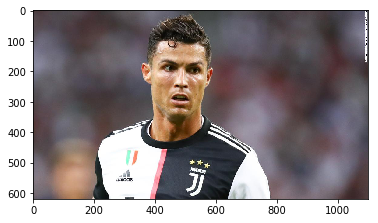

In [7]:
from PIL import Image
import requests
from io import BytesIO

#messi
img_url = 'https://upload.wikimedia.org/wikipedia/commons/c/c1/Lionel_Messi_20180626.jpg'
#ronaldo
img_url = 'https://cdn.cnn.com/cnnnext/dam/assets/190722151514-01-cristiano-ronaldo-0722-super-tease.jpg'

response = requests.get(img_url)
unknown_img = Image.open(BytesIO(response.content))

plt.imshow(unknown_img)
plt.show()


เปลี่ยนให้เป็นภาพสีเทา

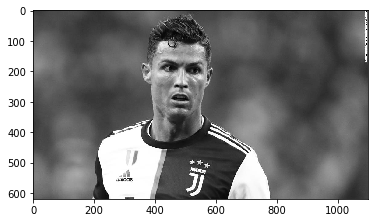

In [8]:
unknown_img = np.array(unknown_img)
unknown_gray_img = cv.cvtColor(unknown_img, cv.COLOR_BGR2GRAY)

plt.gray()
plt.imshow(unknown_gray_img)
plt.show()

## ค้นหาใบหน้า และคำนวณหาคุณลักษณะพิเศษด้วยวิธี HOG

Detected Face: 1
face location and size 365 93 247 247


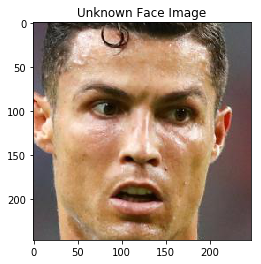

In [9]:
x,y,w,h = face_detection_haarcascade(unknown_gray_img)
  
if((x != 0) and (y != 0)):
  unknown_face_img = unknown_img[y:y+h, x:x+w]
  plt.title('Unknown Face Image')
  plt.imshow(unknown_face_img)
  plt.show()
  re_img = transform.resize(unknown_face_img, (n_rows, n_cols), anti_aliasing=False)
  fd, hog_image = hog_feature(re_img, orientations=8, pixels_per_cell=(8,8), cells_per_block=(1,1))  

## การคำนวณหาค่าความคล้ายคลึงด้วย Cosine Similarity

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

unknown_fv = np.reshape(fd, (1, len(fd)))
known_fv = np.reshape(x_data[0], (1, len(x_data[0])))

print('Similarity:', cosine_similarity(unknown_fv, known_fv)[0][0])

Similarity: 0.8359152398238722


In [11]:
from sklearn.metrics.pairwise import cosine_similarity

thresh = 0.8
simm = []
simm_label = []
simm_label_fullpath = []

for i in range(0, len(x_data)):  
  unknown_fv = np.reshape(fd, (1, len(fd)))
  known_fv = np.reshape(x_data[i], (1, len(x_data[i])))
  simm_value = cosine_similarity(unknown_fv, known_fv)[0][0]
  if(simm_value >= thresh):
    simm.append(simm_value)
    simm_label.append(y_data[i])
    simm_label_fullpath.append(y_full_name[i])
    print(y_data[i])
    print('Similarity:', simm_value)
    print()

coutinho
Similarity: 0.8359152398238722

coutinho
Similarity: 0.8065876845628653

coutinho
Similarity: 0.8468584043426117

coutinho
Similarity: 0.8102852622814971

ronaldo
Similarity: 0.8334716470899504

ronaldo
Similarity: 0.9039097631768186

ronaldo
Similarity: 0.8648419685518773

ronaldo
Similarity: 0.8941105079483238

ronaldo
Similarity: 0.8641208391960842

vandijk
Similarity: 0.8730601346545926

vandijk
Similarity: 0.8804070295460604

vandijk
Similarity: 0.8622767303516385

vandijk
Similarity: 0.8338529767266196

vandijk
Similarity: 0.8404388524585241

messi
Similarity: 0.8555194249927647

messi
Similarity: 0.8541406974623743

messi
Similarity: 0.8534349105639663



## จัดเรียงข้อมูลตามค่า Similar สูงสุด - Most similar value

### การหาค่า Similar ด้วยวิธีที่ 1 

In [12]:
print(simm)
print(simm_label)
print(simm_label_fullpath)

[0.8359152398238722, 0.8065876845628653, 0.8468584043426117, 0.8102852622814971, 0.8334716470899504, 0.9039097631768186, 0.8648419685518773, 0.8941105079483238, 0.8641208391960842, 0.8730601346545926, 0.8804070295460604, 0.8622767303516385, 0.8338529767266196, 0.8404388524585241, 0.8555194249927647, 0.8541406974623743, 0.8534349105639663]
['coutinho', 'coutinho', 'coutinho', 'coutinho', 'ronaldo', 'ronaldo', 'ronaldo', 'ronaldo', 'ronaldo', 'vandijk', 'vandijk', 'vandijk', 'vandijk', 'vandijk', 'messi', 'messi', 'messi']
['/gdrive/My Drive/Colab Notebooks/1-2562-DIP/people-images/coutinho/coutinho-3.jpg', '/gdrive/My Drive/Colab Notebooks/1-2562-DIP/people-images/coutinho/coutinho-5.jpg', '/gdrive/My Drive/Colab Notebooks/1-2562-DIP/people-images/coutinho/coutinho-2.jpg', '/gdrive/My Drive/Colab Notebooks/1-2562-DIP/people-images/coutinho/coutinho-1.jpg', '/gdrive/My Drive/Colab Notebooks/1-2562-DIP/people-images/ronaldo/ronaldo-1.jpg', '/gdrive/My Drive/Colab Notebooks/1-2562-DIP/peop

In [13]:
max_idx = simm.index(max(simm))

print('This person is similar to', simm_label[max_idx].upper())
print('Similar value:', simm[max_idx])

print(simm_label_fullpath[max_idx])


This person is similar to RONALDO
Similar value: 0.9039097631768186
/gdrive/My Drive/Colab Notebooks/1-2562-DIP/people-images/ronaldo/ronaldo-3.jpg


### การหาค่า Similar ด้วยวิธีที่ 2 - โดยใช้ไลบรารี่ pandas

แปลงข้อมูลให้อยู่ในรูปแบบของ dataFrame

In [14]:
import pandas as pd

SM = zip(simm, simm_label, simm_label_fullpath)
simm_df = pd.DataFrame(SM, columns = ['simm', 'label', 'path'])
simm_df

,simm,label,path
0,0.835915,coutinho,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
1,0.806588,coutinho,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
2,0.846858,coutinho,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
3,0.810285,coutinho,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
4,0.833472,ronaldo,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
5,0.903910,ronaldo,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
6,0.864842,ronaldo,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
7,0.894111,ronaldo,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
8,0.864121,ronaldo,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
9,0.873060,vandijk,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...


เรียงข้อมูลตามค่า Similarity (**`simm`**) จากค่ามากไปหาน้อย

In [15]:
sort_simm_df = simm_df.sort_values(by=['simm'], ascending=False)
sort_simm_df

,simm,label,path
5,0.903910,ronaldo,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
7,0.894111,ronaldo,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
10,0.880407,vandijk,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
9,0.873060,vandijk,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
6,0.864842,ronaldo,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
8,0.864121,ronaldo,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
11,0.862277,vandijk,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
14,0.855519,messi,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
15,0.854141,messi,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
16,0.853435,messi,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...


In [23]:
print('This person is similar to', str(sort_simm_df.values[0,1]).upper())
print('Similar value:', sort_simm_df.values[0,0])

print(sort_simm_df.values[0,2])

This person is similar to RONALDO
Similar value: 0.9039097631768186
/gdrive/My Drive/Colab Notebooks/1-2562-DIP/people-images/ronaldo/ronaldo-3.jpg


## แสดงรูปภาพบุคคลที่มีค่า Similar ที่สูงที่สุด - Show most similar face image

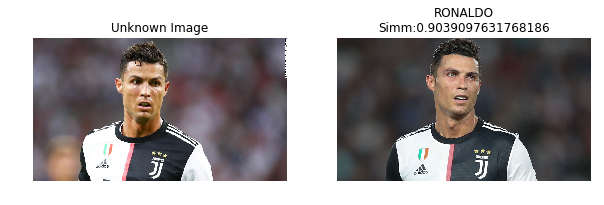

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.axis('off')
plt.title('Unknown Image')
plt.imshow(unknown_img)

known_loc = simm_label_fullpath[max_idx]
k_img, k_gray = return_image(known_loc)

plt.subplot(1,2,2)
plt.axis('off')
plt.title(simm_label[max_idx].upper() + '\nSimm:' + str(simm[max_idx]))
plt.imshow(k_img)

plt.show()

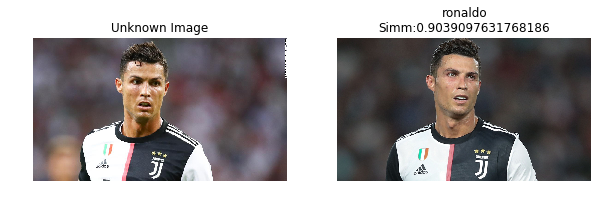

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.axis('off')
plt.title('Unknown Image')
plt.imshow(unknown_img)

known_loc = sort_simm_df.values[0,2]
k_img, k_gray = return_image(known_loc)

plt.subplot(1,2,2)
plt.axis('off')
plt.title(sort_simm_df.values[0,1] + '\nSimm:' + str(sort_simm_df.values[0,0]))
plt.imshow(k_img)

plt.show()

## จัดเรียงข้อมูลโดยใช้ไลบรารี่ของ pandas - Sort most similary value using Pandas

In [26]:
import pandas as pd

SM = zip(simm, simm_label, simm_label_fullpath)
simm_df = pd.DataFrame(SM, columns = ['simm', 'label', 'path'])

sort_simm_df = simm_df.sort_values(by=['simm'], ascending=False)
sort_simm_df

,simm,label,path
5,0.903910,ronaldo,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
7,0.894111,ronaldo,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
10,0.880407,vandijk,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
9,0.873060,vandijk,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
6,0.864842,ronaldo,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
8,0.864121,ronaldo,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
11,0.862277,vandijk,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
14,0.855519,messi,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
15,0.854141,messi,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...
16,0.853435,messi,/gdrive/My Drive/Colab Notebooks/1-2562-DIP/pe...


### ฟังก์ชันแสดงรูปภาพ

In [0]:
def show_most_simm(df, fig_row, fig_col):
  
  plt.figure(figsize=(10,10))
  for i in range(0, ((fig_row * fig_col)+1)):
    try:
      plt.subplot(fig_row, fig_col, i+1)
    
      show_simm = df.values[i,0]
      show_label = df.values[i, 1]    
      img_loc = df.values[i,2]
      color_img, gray_img = return_image(img_loc)
      plt.title(show_label + '\n' + str(show_simm).upper())      
      plt.imshow(color_img)
    except:
      pass
  plt.show()  

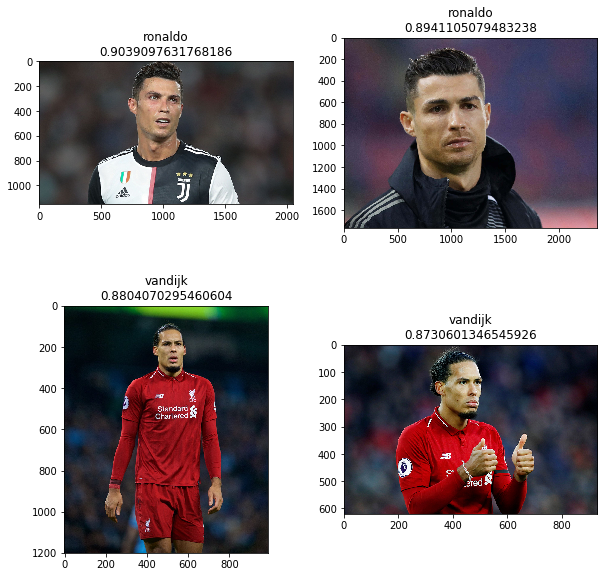

In [30]:
show_most_simm(sort_simm_df, 2, 2)

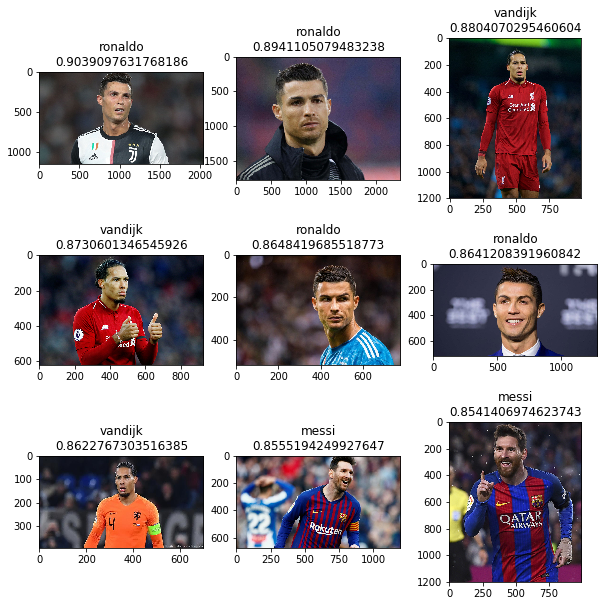

In [31]:
show_most_simm(sort_simm_df, 3, 3)